## creation d'un modele de machine learning qui fait des prediction sur le prix d'achat que peut effectuer un individut en fonction de son profile 

## I - IMPORTATION DES BIBLIOTHEQUES ET DU JEUX DE DONNEES 

In [23]:
#importation des bibliotheque panda pour la manipulation et l'analyse de données
import pandas as pd
#numpy  pour le calcul numérique
import numpy as np
#matplotlib.pyplot pour le traçage de données en Python utilisée pour créer des visualisations statiques
import matplotlib.pyplot as plt
#seaborn pour visualisation de données en Python basée sur Matplotlib
import seaborn as sns

In [24]:
dataset = pd.read_csv("Car_Purchasing_Data.csv")

## II - PREPROCESSING 

In [25]:
dataset.head(10)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,USA,1,57,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,USA,1,47,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,USA,1,50,51752.23445,10985.696560,629312.4041,47434.98265
8,Marny Obrien,Phasellus@sedsemegestas.org,USA,0,47,58139.25910,3440.823799,630059.0274,48013.61410
9,Rhonda Chavez,nec@nuncest.com,USA,1,43,53457.10132,12884.078680,476643.3544,38189.50601


In [26]:
forme = dataset.shape
print(forme)

(500, 9)


In [27]:
#verifcation des données statistique 
dataset.describe()


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [28]:
#verification des données null 
dataset.isnull().all()

Customer Name          False
Customer e-mail        False
Country                False
Gender                 False
Age                    False
Annual Salary          False
Credit Card Debt       False
Net Worth              False
Car Purchase Amount    False
dtype: bool

### Verification de la repartion des valeurs 

In [29]:
dataset['Net Worth'].value_counts()

Net Worth
238961.2505    1
374777.6929    1
515717.7476    1
375654.1472    1
322891.7787    1
              ..
368344.0637    1
352507.9012    1
363561.1972    1
543789.7212    1
462946.4924    1
Name: count, Length: 500, dtype: int64

### Suppression des colonnes qui ne sont pas importante 

In [30]:
dataset.drop(columns=['Customer Name','Customer e-mail','Country' ], axis=1, inplace=True)

In [31]:
dataset.rename(columns={"Annual Salary":"Annual_Salary"}, inplace = True)
dataset.rename(columns={"Credit Card Debt":"Credit_Card_Debt"}, inplace = True)
dataset.rename(columns={"Net Worth":"Net_Worth"}, inplace = True)
dataset.rename(columns={"Car Purchase Amount":"Car_Purchase_Amount"}, inplace = True)


## gestion des outliers

In [32]:
#declaration de notre fonction
def transform_outliers(dataset):
    #declaration de notre bloucle pour reitere les action sur chaque variables 
    for column in dataset.columns: 
        #calcule de Q1 ET Q3
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        #calcule de IQR une mesure de dispersion qui représente la différence entre Q1 ET Q3
        IQR = Q3 - Q1
        #calcule des bornes inferieurs et superieurs 
        lower_bound =  Q1 - 1.5 * IQR
        upper_bound =  Q3 + 1.5 * IQR
        #condition qui verifie si une données est inf ou sup au deux bornes et instruction pour les ramenés 
        dataset[column] = np.where(dataset[column] < lower_bound ,lower_bound, dataset[column])
        dataset[column] = np.where(dataset[column] > upper_bound ,upper_bound, dataset[column])
transform_outliers(dataset)

## II - VISUALISATION

<Axes: >

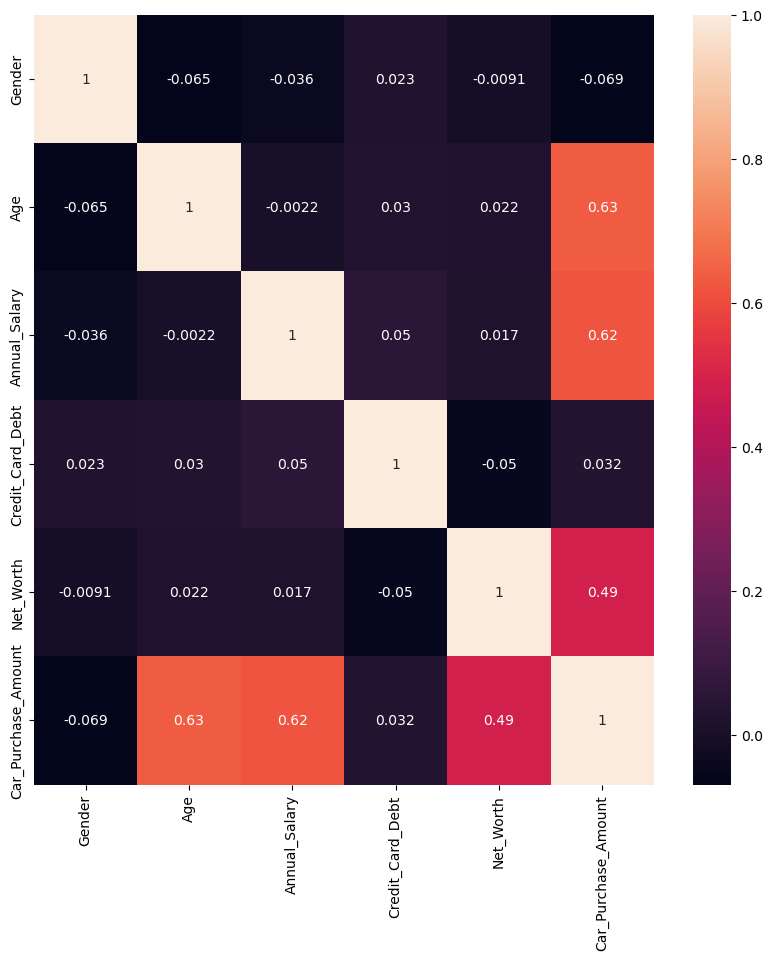

In [33]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True)

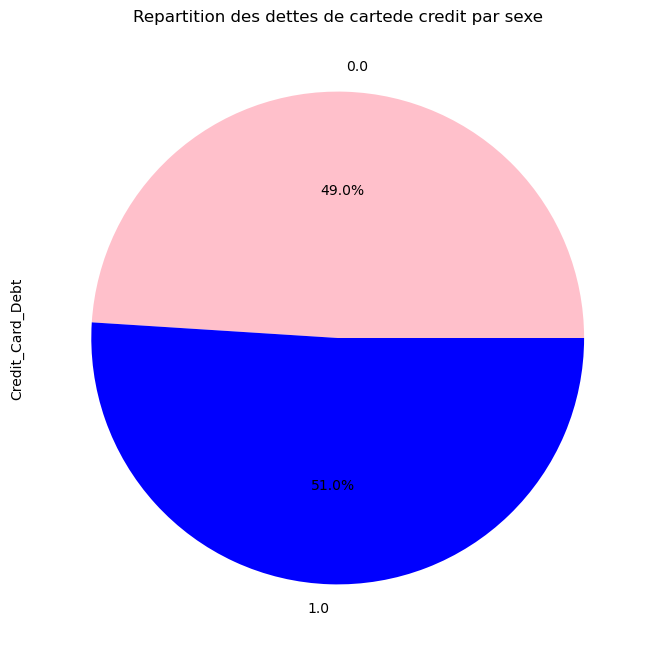

In [34]:
plt.figure(figsize=(8,8))
dataset.groupby('Gender')['Credit_Card_Debt'].sum().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'blue'])
plt.title('Repartition des dettes de cartede credit par sexe')
plt.xlabel('')
plt.show()
# les hommes ont plus de dette que les femmes 

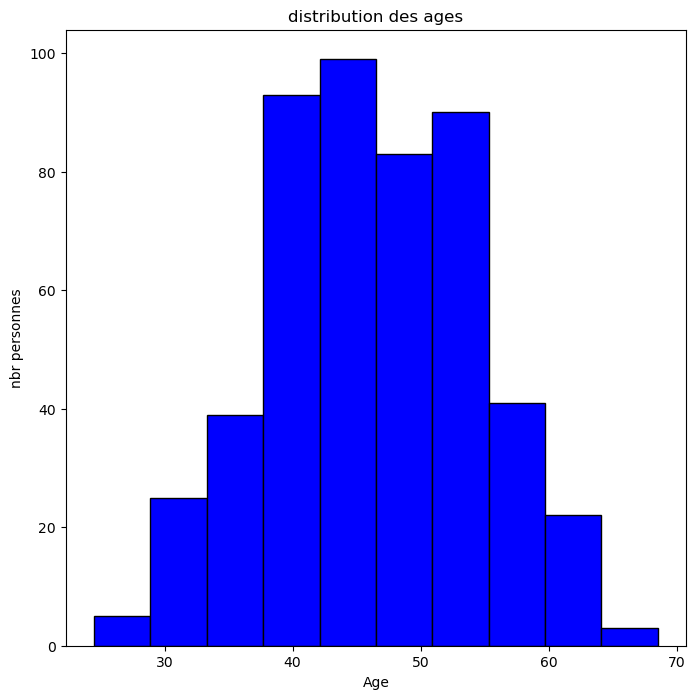

In [35]:
plt.figure(figsize=(8, 8))
plt.hist(dataset['Age'], bins=10, color='blue', edgecolor='black')
plt.title('distribution des ages')
plt.xlabel('Age')
plt.ylabel('nbr personnes')
plt.show()



## entrainement et visaulisatio du model

In [36]:
X = dataset.drop(['Car_Purchase_Amount'], axis=1)
y = dataset[["Car_Purchase_Amount"]]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=123)

In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
X_train

array([[ 1.01342342, -0.06303017, -0.57570779, -0.39342451, -1.50454373],
       [-0.98675438, -0.30796607,  1.2455005 , -0.9965579 ,  1.37468056],
       [ 1.01342342,  0.05943778,  0.87871779, -0.75689552, -1.20296682],
       ...,
       [-0.98675438,  1.65152112, -0.2676138 ,  0.87990923,  1.07880313],
       [ 1.01342342,  0.79424547,  1.17038336, -0.49264171,  0.6384105 ],
       [-0.98675438,  0.54930957,  1.93009091, -0.02095789, -2.31225045]])

In [40]:
# 1- initialisation du modele 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor 

In [41]:
#dictionnaire pour nos hyperparametres
param_grid = {
    #contrôle si le modèle doit ajuster l'ordonnée à l'origine 
    "fit_intercept":[True , False ],
    #contrôle si les données d'entraînement doivent être copiées avant d'être ajustées.
    "copy_X" : [True, False],
    #contrôle si les coefficients de régression doivent être contraints à être positifs
    "positive":[True, False]
}

In [42]:
model = LinearRegression()

In [43]:
#extentiation du modele
#fit permet d'entraine le model sur la base des parm que l'on passe
grid_search = GridSearchCV(model,param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [44]:
#recherche des meilleurs parametres dans le model
best_params = grid_search.best_params_
print(f"Hyper-parametres optimaux: {best_params}")

Hyper-parametres optimaux: {'copy_X': True, 'fit_intercept': True, 'positive': True}


In [45]:
#entrainement des hyper param 
best_model = LinearRegression(**best_params)
best_model.fit(X_train, y_train)

LinearRegression(positive=True)

In [46]:
#verification des metrics ils nous permettent l'efficacité de notre model
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
y_pred_train = best_model.predict(X_train)
mse_train = mean_squared_log_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"training MAE: {mae}")
print(f"training MSE: {mse_train}")
print(f"training R²: {r2_train}")


training MAE: 331.5029094627179
training MSE: 0.0015762069028437118
training R²: 0.9952688952797634


In [47]:
#verification des metrics ils nous permettent l'efficacité de notre model mtn pour les test
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_log_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"testing MAE: {mae_test}")
print(f"testing MSE: {mse_test}")
print(f"testing R²: {r2_test}")
#on remarque que notre Mse a augmente donc le modele n'a pas beaucoup appris

testing MAE: 230.6019628240388
testing MSE: 6.065194483653686e-05
testing R²: 0.9992011927768535


In [48]:
#POUR UN HOMME 
X_new = sc.transform(np.array([1, 42.0, 62812.09301, 11609.380910,238961.2505]).reshape(1,-1))
y_new = best_model.predict(X_new)
print(f'Prediction:{y_new}')

Prediction:[[35710.63627633]]


c:\Users\Elie\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [49]:
import joblib

# Sauvegarde du modèle entraîné
joblib.dump(grid_search.best_estimator_, "best_model.pkl")


['best_model.pkl']